<a href="https://colab.research.google.com/github/PDeySarkar103/ML_Astrophysics/blob/main/SDSS_Classification_using_ML_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from warnings import filterwarnings
filterwarnings(action='ignore')

# Loading Datasets

In [4]:
from google.colab import files
uploaded=files.upload()

Saving SDSS_DR18.csv to SDSS_DR18.csv


In [5]:
df=pd.read_csv('SDSS_DR18.csv')

In [6]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237678595943104526,0.200734,1.553804,18.63738,18.29874,18.36940,18.36102,18.32960,7712,301,1,331,4836960650055145472,QSO,0.663269,4296,55499,344
1,1237678595943891080,2.114939,1.516268,19.08228,18.10613,17.77351,17.62447,17.56927,7712,301,1,343,8840573332577605632,STAR,-0.000072,7852,56987,26
2,1237678595944284267,2.884775,1.490638,19.16559,19.07357,19.05560,18.82552,18.74828,7712,301,1,349,10590364192686233600,QSO,1.656637,9406,58067,544
3,1237661951346868587,228.321014,10.357104,19.04752,18.16190,17.86432,17.75147,17.72200,3836,301,6,524,6180191682749028352,STAR,0.000315,5489,55990,462
4,1237661951347130681,228.915159,10.257994,19.50768,18.54116,18.21489,18.09469,18.06274,3836,301,6,528,6180170242272286720,STAR,0.000088,5489,55990,384


In [7]:
df.shape

(100000, 18)

# EDA(Exploratory Data Analysis)

In [8]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      100000 non-null  int64  
 1   ra         100000 non-null  float64
 2   dec        100000 non-null  float64
 3   u          100000 non-null  float64
 4   g          100000 non-null  float64
 5   r          100000 non-null  float64
 6   i          100000 non-null  float64
 7   z          100000 non-null  float64
 8   run        100000 non-null  int64  
 9   rerun      100000 non-null  int64  
 10  camcol     100000 non-null  int64  
 11  field      100000 non-null  int64  
 12  specobjid  100000 non-null  uint64 
 13  class      100000 non-null  object 
 14  redshift   100000 non-null  float64
 15  plate      100000 non-null  int64  
 16  mjd        100000 non-null  int64  
 17  fiberid    100000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 13.7+

In [10]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.00000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237663e+18,177.797876,25.041795,18.639093,17.406544,16.879708,16.623138,16.464124,3978.843100,301.0,3.27923,185.955450,2.915911e+18,0.170547,2589.765470,53914.026280,341.667890
std,7.265368e+12,77.882222,20.610427,0.831101,0.985331,1.133256,1.210339,1.283457,1691.598544,0.0,1.62332,140.673636,2.497101e+18,0.437423,2217.856266,1549.346672,216.984519
min,1.237646e+18,0.013061,-19.495456,10.611810,9.668339,9.005167,8.896696,8.947795,109.000000,301.0,1.00000,11.000000,2.994897e+17,-0.004136,266.000000,51608.000000,1.000000
25%,1.237658e+18,136.612196,6.741517,18.214200,16.850478,16.194423,15.862105,15.615638,2826.000000,301.0,2.00000,85.000000,1.335371e+18,0.000004,1186.000000,52733.000000,160.000000
50%,1.237662e+18,180.193739,23.913858,18.874680,17.514410,16.888650,16.596465,16.424345,3900.000000,301.0,3.00000,151.000000,2.339726e+18,0.046213,2078.000000,53714.000000,327.000000
75%,1.237667e+18,224.491114,40.401875,19.273872,18.055160,17.584183,17.343692,17.232347,5061.000000,301.0,5.00000,247.000000,3.275656e+18,0.095564,2909.250000,54585.000000,502.000000
max,1.237681e+18,359.999615,84.490494,19.599990,19.996050,31.990100,32.141470,30.017040,8162.000000,301.0,6.00000,982.000000,1.412681e+19,7.011245,12547.000000,58932.000000,1000.000000


In [11]:
df['class'].nunique() # Shows no. of unique entries in the class column

3

In [12]:
df['class'].unique() # The unique elements in class column

array(['QSO', 'STAR', 'GALAXY'], dtype=object)

In [13]:
df['class'].value_counts()

GALAXY    51477
STAR      37952
QSO       10571
Name: class, dtype: int64

# Visualization of Data

In [14]:
sns.set(style='darkgrid',palette='dark')

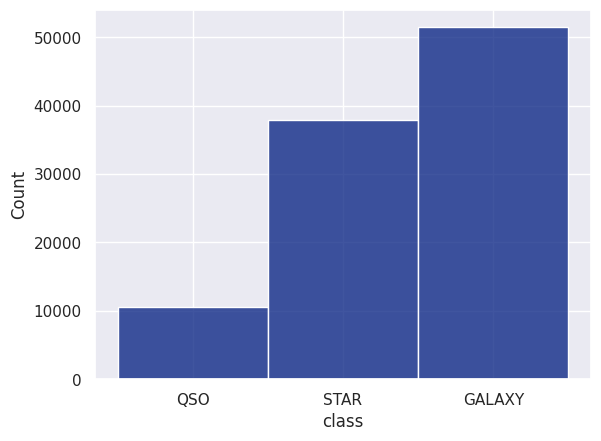

In [15]:
sns.histplot(x=df['class'])
plt.show()

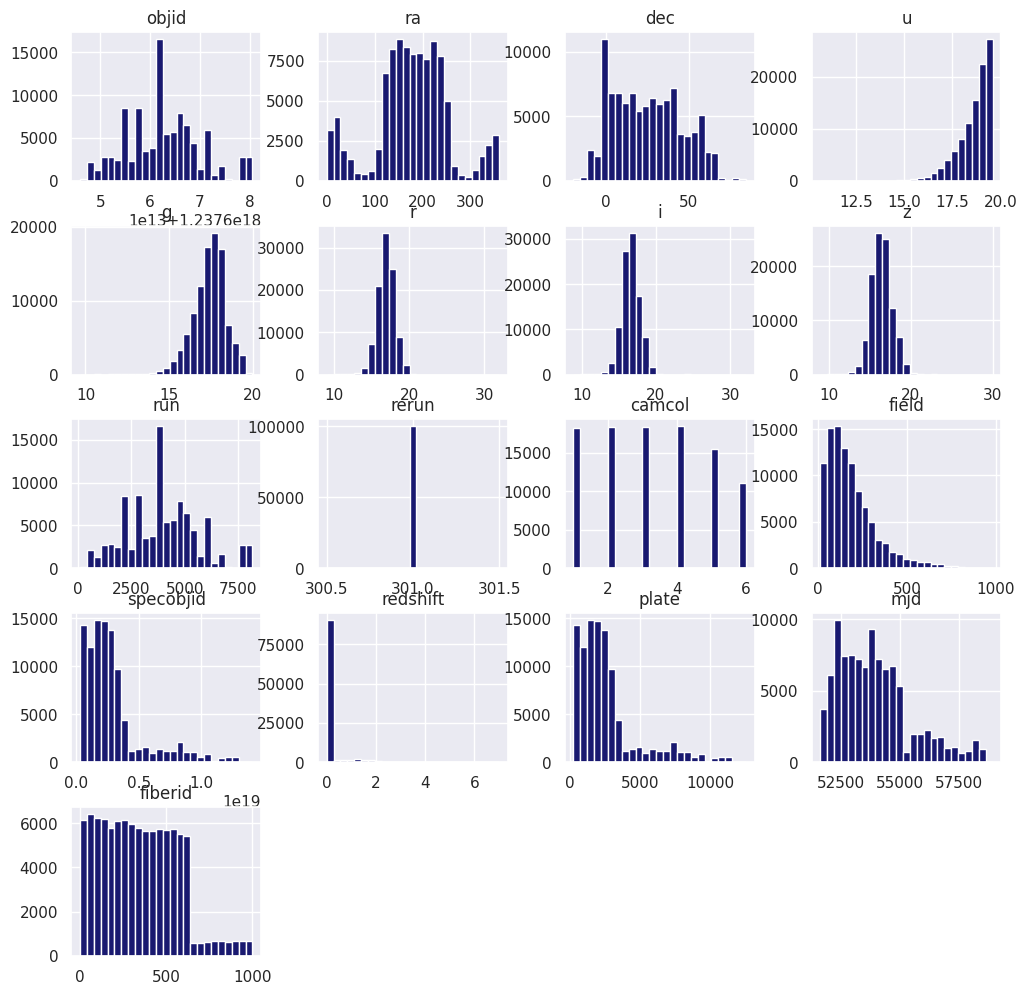

In [16]:
df.hist(bins=25,figsize=(12,12),color='midnightblue')
plt.show()

# Feature Selection

In [17]:
X=df[['u','g','r','i','z','redshift','plate']]
X

,u,g,r,i,z,redshift,plate
0,18.63738,18.29874,18.36940,18.36102,18.32960,0.663269,4296
1,19.08228,18.10613,17.77351,17.62447,17.56927,-0.000072,7852
2,19.16559,19.07357,19.05560,18.82552,18.74828,1.656637,9406
3,19.04752,18.16190,17.86432,17.75147,17.72200,0.000315,5489
4,19.50768,18.54116,18.21489,18.09469,18.06274,0.000088,5489
...,...,...,...,...,...,...,...
99995,18.62674,16.62286,15.50753,15.03349,14.64636,0.122804,1733
99996,17.91854,16.64709,16.02936,15.69425,15.44102,0.017162,1737
99997,18.73030,17.10239,16.29156,15.89123,15.60361,0.090165,1825
99998,19.12102,17.29231,16.36779,15.93414,15.59609,0.083965,1830


In [18]:
Y=df['class']
Y

0           QSO
1          STAR
2           QSO
3          STAR
4          STAR
          ...  
99995    GALAXY
99996    GALAXY
99997    GALAXY
99998    GALAXY
99999    GALAXY
Name: class, Length: 100000, dtype: object

# Encoding

In [19]:
#encoder={'GALAXY':1,'STAR':0,'QSO':2}
#df['class']=df['class'].map(encoder)

In [20]:
#df['class'].value_counts()

In [21]:
# We can also use scikit learn for this
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Y=LE.fit_transform(Y)

In [22]:
Y

array([1, 2, 1, ..., 0, 0, 0])

In [23]:
# GALAXY= 0
# QSO   = 1
# STAR  = 2

# Resampling

# Splitting Datasets

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.25,random_state=30)

In [25]:
X_train

,u,g,r,i,z,redshift,plate
31265,17.20563,16.03145,16.00162,15.71918,15.70611,-0.000009,3160
3537,19.20663,18.95793,18.92223,18.91342,19.03320,1.435867,1452
57343,19.19805,17.96483,17.10932,16.66474,16.39022,0.197102,2530
86296,19.32565,19.11092,18.92424,18.95652,18.85320,0.888364,2420
52384,18.71092,16.99255,16.17041,15.77641,15.47706,0.072794,1439
...,...,...,...,...,...,...,...
46220,16.94216,15.56115,14.82876,14.44235,14.15236,0.022492,759
98804,18.86054,17.85633,17.48691,17.17095,17.03851,0.085369,2580
48045,19.30882,18.21492,17.79387,17.51591,17.30011,0.045163,954
70053,18.96879,17.73527,17.05081,16.64575,16.39163,0.101171,1313


In [26]:
y_train

array([2, 1, 0, ..., 0, 0, 2])

# Classification Algorithms

In [27]:
# Creating a dataframe to store the accuracy scores of all the classification algorithms so that we are able to choose the best one

score_df=pd.DataFrame(columns=['Algorithm','Recall_Score'])

## Logistic Regression

In [28]:
# Training the ML model

from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

y_pred1=model.predict(X_test)

Text(46.25, 0.5, 'Prediction')

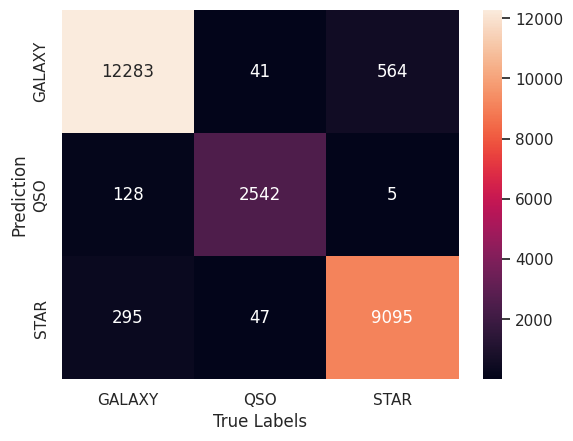

In [29]:
# Generating the confusion matrix

from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_pred1)
sns.heatmap(cm_lr,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

In [30]:
# Getting the Recall score

from sklearn.metrics import recall_score
LR_score=recall_score(y_test,y_pred1,average='weighted')
#print(LR_score)
# Adding Recall Score to the table

score_df=score_df.append({'Algorithm':'Logistic Regression','Recall_Score':LR_score},ignore_index=True)
score_df

,Algorithm,Recall_Score
0,Logistic Regression,0.9568


## Decision Tree

In [31]:
# Training the ML model

from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(random_state=30)
model.fit(X_train,y_train)

y_pred2=model.predict(X_test)

Text(46.25, 0.5, 'Prediction')

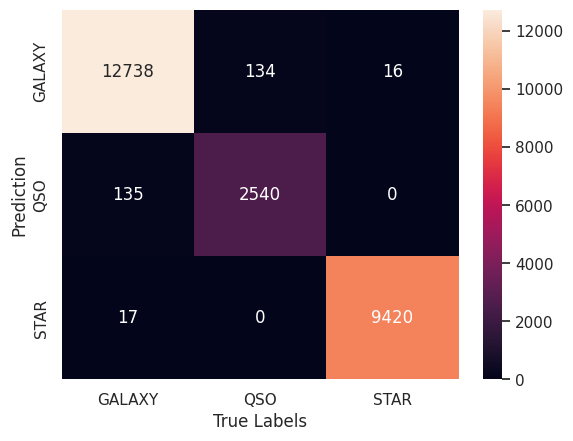

In [32]:
# Generating the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test,y_pred2)

sns.heatmap(cm_dt,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

In [33]:
# Getting the Recall score

from sklearn.metrics import recall_score
dt_score=recall_score(y_test,y_pred2,average='weighted')
#print(LR_score)
# Adding Recall Score to the table

score_df=score_df.append({'Algorithm':'Decision Tree','Recall_Score':dt_score},ignore_index=True)
score_df

,Algorithm,Recall_Score
0,Logistic Regression,0.95680
1,Decision Tree,0.98792


## Random Forest

In [34]:
# First, we'll create a dataframe where we'll store recall score of random forest algorithm with different values of n_estimators
# Then, we'll choose the maximum one and consider that as the recall score

rf_df=pd.DataFrame(columns=['Estimators','Recall score'])

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

for i in range(1,31):
  model=RandomForestClassifier(n_estimators=i,random_state=30)
  model.fit(X_train,y_train)
  y_pred3=model.predict(X_test)
  rf_df=rf_df.append({'Estimators':i,'Recall score':recall_score(y_test,y_pred3,average='weighted')},ignore_index=True)


In [36]:
rf_df

,Estimators,Recall score
0,1.0,0.97964
1,2.0,0.98372
2,3.0,0.98924
3,4.0,0.99004
4,5.0,0.99060
5,6.0,0.99020
6,7.0,0.99112
7,8.0,0.99120
8,9.0,0.99156
9,10.0,0.99144


In [37]:
# Sorting

rf_df=rf_df.sort_values(by='Recall score',ascending=False)
rf_df.head()

,Estimators,Recall score
28,29.0,0.99184
27,28.0,0.99180
26,27.0,0.99180
29,30.0,0.99168
24,25.0,0.99168


The above table shows that the recall score is highest for n=29.0. So we'll keep n_estimators=29.0

In [38]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=29,random_state=30)
model.fit(X_train,y_train)
y_pred3=model.predict(X_test)

from sklearn.metrics import recall_score
rf_score=recall_score(y_test,y_pred3,average='weighted')
rf_score

0.99184

In [39]:
# Adding accuracy to the data frame
score_df=score_df.append({'Algorithm':'Random Forest','Recall_Score':rf_score},ignore_index=True)
score_df

,Algorithm,Recall_Score
0,Logistic Regression,0.95680
1,Decision Tree,0.98792
2,Random Forest,0.99184


Text(46.25, 0.5, 'Prediction')

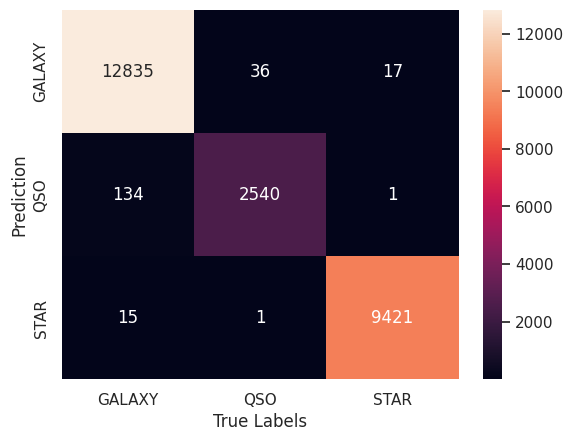

In [40]:
# Generating the confusion matrix
from sklearn.metrics import confusion_matrix

cm_rf=confusion_matrix(y_test,y_pred3)

sns.heatmap(cm_rf,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

## KNN

In [41]:
# We'll create a dataframe to store recall score of K Neighbour Classifiers with different n_neighbour values.
# From there, we shall choose the maximum one and consider that as recall score for KNN algo.

knn_df=pd.DataFrame(columns=['Neighbors','Recall Score'])

In [42]:
# Algorithm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

for i in range(1,31):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  y_pred4=model.predict(X_test)
  knn_df=knn_df.append({'Neighbors':i,'Recall Score':recall_score(y_test,y_pred4,average='weighted')},ignore_index=True)

knn_df

,Neighbors,Recall Score
0,1.0,0.88776
1,2.0,0.88348
2,3.0,0.89092
3,4.0,0.88940
4,5.0,0.88696
5,6.0,0.88380
6,7.0,0.88140
7,8.0,0.87880
8,9.0,0.87612
9,10.0,0.87408


In [43]:
knn_df=knn_df.sort_values(by='Recall Score',ascending=False)
knn_df.head()

,Neighbors,Recall Score
2,3.0,0.89092
3,4.0,0.88940
0,1.0,0.88776
4,5.0,0.88696
5,6.0,0.88380


Here, we see the recall score is maximum for n=3.0 Hence, we will choose n=3.0

In [44]:
# KNN algo for n_neighbors=3.0

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred4=model.predict(X_test)

from sklearn.metrics import recall_score
knn_score=recall_score(y_test,y_pred4,average='weighted')
print(knn_score)

0.89092


In [45]:
score_df=score_df.append({'Algorithm':'KNN','Recall_Score':knn_score},ignore_index=True)
score_df

,Algorithm,Recall_Score
0,Logistic Regression,0.95680
1,Decision Tree,0.98792
2,Random Forest,0.99184
3,KNN,0.89092


Text(46.25, 0.5, 'Prediction')

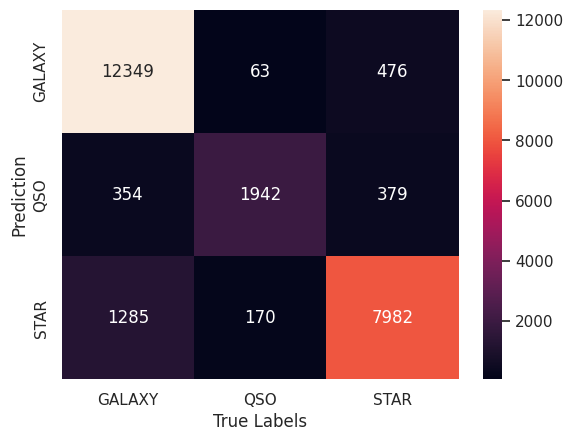

In [46]:
# Viewing the Confusion matrix
from sklearn.metrics import confusion_matrix

cm_knn=confusion_matrix(y_test,y_pred4)

sns.heatmap(cm_knn,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

## SVM

# Neural Networks

## Artificial Neural Network(ANN)

First, we shall do th feature selection again

In [47]:
Xr=df[['u','g','r','i','z','redshift','plate']]
yr=df['class']

Here, we need to reencode the class as follows.

In [48]:
from keras.utils import to_categorical
l_encode=LabelEncoder()
l_encode.fit(yr)
Yr=l_encode.transform(yr)
Yr=to_categorical(Yr)

Now, we shall split to training and testing data set

In [49]:
from sklearn.model_selection import train_test_split
Xr_train, Xr_test, yr_train, yr_test= train_test_split(Xr,Yr,test_size=0.25,random_state=210)

In [50]:
Xr_train.shape

(75000, 7)

Now, we shall make the model. For that we have to import th following

In [51]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

Now, we shall start with the model.

In [52]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_dim=Xr_train.shape[1],activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(15,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax'),
    ])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 100)               6500      
                                                                 
 dense_2 (Dense)             (None, 32)                3232      
                                                                 
 dense_3 (Dense)             (None, 15)                495       
                                                                 
 dense_4 (Dense)             (None, 3)                 48        
                                                                 
Total params: 10787 (42.14 KB)
Trainable params: 10787 (42.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(Xr_train,yr_train,validation_data=(Xr_test,yr_test),epochs=40,verbose=0)

<Axes: >

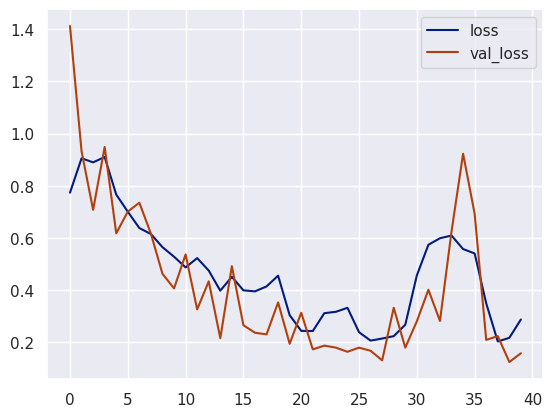

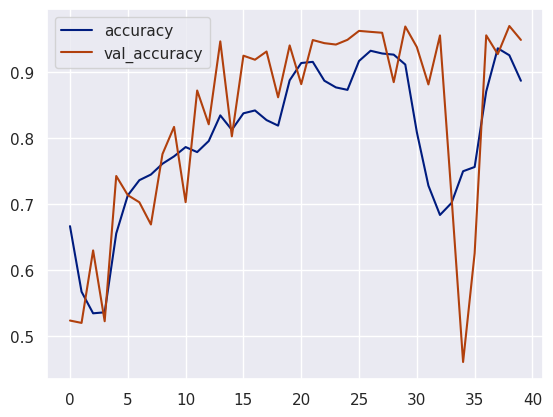

In [56]:
model_loss_acc = pd.DataFrame(model.history.history)
model_loss_acc[['loss', 'val_loss']].plot()
model_loss_acc[['accuracy', 'val_accuracy']].plot()

In [57]:
y_pred6=np.round(model.predict(Xr_test))

782/782 [==============================] - 1s 2ms/step


In [58]:
y_pred6

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [59]:
from sklearn.metrics import recall_score

ann_score=recall_score(yr_test,y_pred6,average='weighted')
ann_score

0.94904

# Comparing all the algorithms

In [ ]:
plt.figure(figsize=(15,15))
plt.suptitle('Confusion matrix for different algorithms')

plt.subplot(321)
plt.title('Logistic Regression')
sns.heatmap(cm_lr,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(322)
plt.title('Decision Tree')
sns.heatmap(cm_dt,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(323)
plt.title('Random forest')
sns.heatmap(cm_rf,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')

plt.subplot(324)
plt.title('KNN')
sns.heatmap(cm_knn,annot=True,fmt='g',xticklabels=['GALAXY','QSO','STAR'],yticklabels=['GALAXY','QSO','STAR'])
plt.xlabel('True Labels')
plt.ylabel('Prediction')